In [1]:
# import required libraries
# pandas:Data framework library for Python
# sklearn: Library to perform machine learning tasks
import pandas as pd
import pandas
import numpy as np
import scipy
import scipy.stats as st
import sklearn 
import sklearn.datasets
import sklearn.metrics as metrics 
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import StratifiedKFold
from sklearn.svm import SVC
from sklearn.grid_search import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.cross_validation import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.feature_selection import mutual_info_classif
from scipy import stats
from datetime import datetime

/Users/James/anaconda3/lib/python3.5/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
/Users/James/anaconda3/lib/python3.5/site-packages/sklearn/grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


In [3]:
Data_2017 = pd.read_excel("Data/PERM_Disclosure_Data_FY17.xlsx")
Data_2015 = pd.read_excel("Data/PERM_Disclosure_Data_FY15_Q4.xlsx")
Data_2016 = pd.read_excel("Data/PERM_Disclosure_Data_FY16.xlsx")

In [4]:
Data_2015.at[8809, 'RI_LOCAL_ETHNIC_PAPER_FROM'] = datetime.strptime('10/22/2014', '%m/%d/%Y')
Data_2015.at[29257, 'RI_LOCAL_ETHNIC_PAPER_FROM'] = datetime.strptime('10/06/2014', '%m/%d/%Y')
Data_2015.at[86322, 'RI_LOCAL_ETHNIC_PAPER_FROM'] = datetime.strptime('03/09/2015', '%m/%d/%Y')
Data_2015['RI_LOCAL_ETHNIC_PAPER_FROM'] = pandas.to_datetime(Data_2015['RI_LOCAL_ETHNIC_PAPER_FROM'])
Data_2015['RECR_INFO_SWA_JOB_ORDER_START'] = pandas.to_datetime(Data_2015['RECR_INFO_SWA_JOB_ORDER_START'])
Data_2015.at[6306, 'RECR_INFO_SWA_JOB_ORDER_END'] = datetime.strptime('05/26/2014', '%m/%d/%Y')
Data_2015.at[8602, 'RECR_INFO_SWA_JOB_ORDER_END'] = datetime.strptime('11/08/2014', '%m/%d/%Y')
Data_2015.at[12210, 'RECR_INFO_SWA_JOB_ORDER_END'] = datetime.strptime('05/25/2014', '%m/%d/%Y')
Data_2015.at[35208, 'RECR_INFO_SWA_JOB_ORDER_END'] = datetime.strptime('08/30/2013', '%m/%d/%Y')
Data_2015.at[41211, 'RECR_INFO_SWA_JOB_ORDER_END'] = datetime.strptime('03/25/2014', '%m/%d/%Y')
Data_2015.at[79773, 'RECR_INFO_SWA_JOB_ORDER_END'] = datetime.strptime('05/19/2014', '%m/%d/%Y')
Data_2015.at[80176, 'RECR_INFO_SWA_JOB_ORDER_END'] = datetime.strptime('06/14/2015', '%m/%d/%Y')
Data_2015.at[80177, 'RECR_INFO_SWA_JOB_ORDER_END'] = datetime.strptime('06/14/2015', '%m/%d/%Y')
Data_2015.at[83651, 'RECR_INFO_SWA_JOB_ORDER_END'] = datetime.strptime('05/26/2013', '%m/%d/%Y')
Data_2015['RECR_INFO_SWA_JOB_ORDER_END'] = pandas.to_datetime(Data_2015['RECR_INFO_SWA_JOB_ORDER_END'])
Data_2015.at[76114, 'RI_EMPLOYER_WEB_POST_FROM'] = datetime.strptime('04/22/2014', '%m/%d/%Y')
Data_2015.at[89154, 'RI_EMPLOYER_WEB_POST_FROM'] = datetime.strptime('05/01/2015', '%m/%d/%Y')
Data_2015['RI_EMPLOYER_WEB_POST_FROM'] = pandas.to_datetime(Data_2015['RI_EMPLOYER_WEB_POST_FROM'])
Data_2015.at[29489, 'RECR_INFO_PRO_ORG_ADVERT_FROM'] = datetime.strptime('01/01/2013', '%m/%d/%Y')
Data_2015['RECR_INFO_PRO_ORG_ADVERT_FROM'] = pandas.to_datetime(Data_2015['RECR_INFO_PRO_ORG_ADVERT_FROM'])
Data_2015.at[26192, 'RI_JOB_SEARCH_WEBSITE_FROM'] = datetime.strptime('01/13/2014', '%m/%d/%Y')
Data_2015.at[70342, 'RI_JOB_SEARCH_WEBSITE_FROM'] = datetime.strptime('05/02/2014', '%m/%d/%Y')
Data_2015.at[83733, 'RI_JOB_SEARCH_WEBSITE_FROM'] = datetime.strptime('11/15/2011', '%m/%d/%Y')
Data_2015['RI_JOB_SEARCH_WEBSITE_FROM'] = pandas.to_datetime(Data_2015['RI_JOB_SEARCH_WEBSITE_FROM'])
Data_2015.at[24138, 'RI_EMPLOYEE_REFERRAL_PROG_FROM'] = datetime.strptime('12/23/2014', '%m/%d/%Y')
Data_2015.at[38262, 'RI_EMPLOYEE_REFERRAL_PROG_FROM'] = datetime.strptime('06/04/2014', '%m/%d/%Y')
Data_2015.at[47808, 'RI_EMPLOYEE_REFERRAL_PROG_FROM'] = datetime.strptime('06/25/2014', '%m/%d/%Y')
Data_2015['RI_EMPLOYEE_REFERRAL_PROG_FROM'] = pandas.to_datetime(Data_2015['RI_EMPLOYEE_REFERRAL_PROG_FROM'])
Data_2015.at[14771, 'RI_CAMPUS_PLACEMENT_FROM'] = datetime.strptime('04/01/2013', '%m/%d/%Y')
Data_2015.at[49525, 'RI_CAMPUS_PLACEMENT_FROM'] = datetime.strptime('05/02/2013', '%m/%d/%Y')
Data_2015.at[73061, 'RI_CAMPUS_PLACEMENT_FROM'] = datetime.strptime('09/23/2014', '%m/%d/%Y')
Data_2015['RI_CAMPUS_PLACEMENT_FROM'] = pandas.to_datetime(Data_2015['RI_CAMPUS_PLACEMENT_FROM'])
Data_2017.at[31198, 'RECR_INFO_SWA_JOB_ORDER_START'] = datetime.strptime('03/30/2016', '%m/%d/%Y')
Data_2017.at[77798, 'RECR_INFO_SWA_JOB_ORDER_START'] = datetime.strptime('04/26/2017', '%m/%d/%Y')
Data_2017.at[92988, 'RECR_INFO_SWA_JOB_ORDER_START'] = datetime.strptime('03/30/2017', '%m/%d/%Y')

Data_2017['RECR_INFO_SWA_JOB_ORDER_START'] = pandas.to_datetime(Data_2017['RECR_INFO_SWA_JOB_ORDER_START'])
#Data_2017.at[31198, 'RECR_INFO_SWA_JOB_ORDER_START'] = datetime.strptime('03/30/2016', '%m/%d/%Y')
#Data_2017.at[77798, 'RECR_INFO_SWA_JOB_ORDER_START'] = datetime.strptime('04/26/2017', '%m/%d/%Y')
Data_2017.at[704, 'RECR_INFO_SWA_JOB_ORDER_END'] = datetime.strptime('03/17/2016', '%m/%d/%Y')
Data_2017.at[2932, 'RECR_INFO_SWA_JOB_ORDER_END'] = datetime.strptime('04/13/2016', '%m/%d/%Y')
Data_2017.at[18749, 'RECR_INFO_SWA_JOB_ORDER_END'] = datetime.strptime('05/13/2016', '%m/%d/%Y')
Data_2017.at[73589, 'RECR_INFO_SWA_JOB_ORDER_END'] = datetime.strptime('03/05/2017', '%m/%d/%Y')
Data_2017.at[82743, 'RECR_INFO_SWA_JOB_ORDER_END'] = datetime.strptime('03/06/2017', '%m/%d/%Y')
Data_2017.at[92390, 'RECR_INFO_SWA_JOB_ORDER_END'] = datetime.strptime('03/27/2017', '%m/%d/%Y')
Data_2017.at[93721, 'RECR_INFO_SWA_JOB_ORDER_END'] = datetime.strptime('03/27/2017', '%m/%d/%Y')
Data_2017.at[96292, 'RECR_INFO_SWA_JOB_ORDER_END'] = datetime.strptime('03/05/2017', '%m/%d/%Y')
Data_2017['RECR_INFO_SWA_JOB_ORDER_END'] = pandas.to_datetime(Data_2017['RECR_INFO_SWA_JOB_ORDER_END'])
Data_2016.at[96389, 'RECR_INFO_SWA_JOB_ORDER_START'] = datetime.strptime('03/30/2016', '%m/%d/%Y')
Data_2016['RECR_INFO_SWA_JOB_ORDER_START'] = pandas.to_datetime(Data_2016['RECR_INFO_SWA_JOB_ORDER_START'])
Data_2016.at[29552, 'RECR_INFO_SWA_JOB_ORDER_END'] = datetime.strptime('06/04/2015', '%m/%d/%Y')
Data_2016.at[33362, 'RECR_INFO_SWA_JOB_ORDER_END'] = datetime.strptime('03/06/2015', '%m/%d/%Y')
Data_2016.at[49878, 'RECR_INFO_SWA_JOB_ORDER_END'] = datetime.strptime('03/02/2015', '%m/%d/%Y')
Data_2016.at[60593, 'RECR_INFO_SWA_JOB_ORDER_END'] = datetime.strptime('08/03/2015', '%m/%d/%Y')
Data_2016.at[91218, 'RECR_INFO_SWA_JOB_ORDER_END'] = datetime.strptime('11/30/2015', '%m/%d/%Y')
Data_2016.at[113096, 'RECR_INFO_SWA_JOB_ORDER_END'] = datetime.strptime('03/15/2016', '%m/%d/%Y')
Data_2016.at[114287, 'RECR_INFO_SWA_JOB_ORDER_END'] = datetime.strptime('03/30/2016', '%m/%d/%Y')
Data_2016.at[120997, 'RECR_INFO_SWA_JOB_ORDER_END'] = datetime.strptime('03/30/2016', '%m/%d/%Y')
Data_2016['RECR_INFO_SWA_JOB_ORDER_END'] = pandas.to_datetime(Data_2016['RECR_INFO_SWA_JOB_ORDER_END'])

In [5]:
frames = [Data_2015, Data_2016, Data_2017]

data = pd.concat(frames)
data = data.drop_duplicates()
data_raw = data.copy()

## Transforming the columns

In [6]:
#For wages that have a to and from, Im just gonna take the average
data_wage = data[['WAGE_OFFER_UNIT_OF_PAY_9089','WAGE_OFFER_FROM_9089','WAGE_OFFER_TO_9089','CASE_STATUS']]
#cleaning up the wages of the offer
#pd.to_numeric(data_wage['WAGE_OFFER_FROM_9089'])
data['WAGE_OFFER_FROM_9089'] = data['WAGE_OFFER_FROM_9089'].apply(lambda word: str(word).replace("#", ""))
data['WAGE_OFFER_FROM_9089'] = data['WAGE_OFFER_FROM_9089'].apply(lambda word: str(word).replace(",", ""))
data['WAGE_OFFER_FROM_9089'] = data['WAGE_OFFER_FROM_9089'].replace({"nan": np.NaN})
data['WAGE_OFFER_FROM_9089'] = pd.to_numeric(data['WAGE_OFFER_FROM_9089'])
data['WAGE_OFFER_TO_9089'] = data['WAGE_OFFER_TO_9089'].apply(lambda word: str(word).replace("#", ""))
data['WAGE_OFFER_TO_9089'] = data['WAGE_OFFER_TO_9089'].apply(lambda word: str(word).replace(",", ""))
data['WAGE_OFFER_TO_9089'] = data['WAGE_OFFER_TO_9089'].replace({"nan": np.NaN})
data['WAGE_OFFER_TO_9089'] = pd.to_numeric(data['WAGE_OFFER_TO_9089'])

In [7]:
#Getting average wage for to - from
data['Avg_Wage'] = np.where(pd.isnull(data['WAGE_OFFER_TO_9089']) == True,data['WAGE_OFFER_FROM_9089'], ((data['WAGE_OFFER_TO_9089']+ data['WAGE_OFFER_FROM_9089']) / 2)) 
data.WAGE_OFFER_UNIT_OF_PAY_9089.fillna('None', inplace=True)
data['WAGE_OFFER_UNIT_OF_PAY_9089'] = data['WAGE_OFFER_UNIT_OF_PAY_9089'].astype('str') 

In [8]:
#Transforming units to yearly equivalents
data['unit'] = data['WAGE_OFFER_UNIT_OF_PAY_9089']
data['unit'] = data['unit'].replace({"Hour": 2080, "Week":52,"Month":12,"Bi-Weekly":26,"Year":1,"None":np.NaN})
data['unit'] = pd.to_numeric(data['unit'])
#calculating yearly wage
data['Year_wage_offer'] = data['Avg_Wage'] * data['unit']

In [9]:
#Changing over prevailing wage amounts
data['PW_AMOUNT_9089'] = data['PW_AMOUNT_9089'].apply(lambda word: str(word).replace("#", ""))
data['PW_AMOUNT_9089'] = data['PW_AMOUNT_9089'].apply(lambda word: str(word).replace(",", ""))
data['PW_AMOUNT_9089'] = data['PW_AMOUNT_9089'].replace({"nan": np.NaN})
data['PW_AMOUNT_9089'] = pd.to_numeric(data['PW_AMOUNT_9089'])
data['unit_pw'] = data['PW_UNIT_OF_PAY_9089']
data['unit_pw'] = data['unit_pw'].replace({"Hour": 2080, "Week":52,"Month":12,"Bi-Weekly":26,"Year":1,"None":np.NaN})
data['unit_pw'] = pd.to_numeric(data['unit_pw'])
data['Year_wage_pw'] = data['PW_AMOUNT_9089'] * data['unit_pw']

In [10]:
#Filling up the nulls with the medians from the industry / level for both prevailing wage and offer
data['Ind_code'] = data['PW_SOC_CODE'].apply(lambda num: str(num)[:2])
data['Wage_level'] =  data['PW_LEVEL_9089'].replace({"Level I": 1, "Level II": 2, "Level III":3,"Level IV":4}) 
data['Wage_level'] = data['Wage_level'].fillna("None")
norm_wage = pd.DataFrame(data.groupby(['Ind_code','Wage_level'])['Year_wage_pw'].median())
norm_wage.columns= ["Median_pw"]
data['Year_wage_pw'] = data['Year_wage_pw'].fillna(data.merge(norm_wage, how = "left", left_on = ['Ind_code','Wage_level'], right_index = True)['Median_pw'])
norm_wage_off = pd.DataFrame(data.groupby(['Ind_code','Wage_level'])['Year_wage_offer'].median())
norm_wage_off.columns= ["Median_offer"]
data['Year_wage_offer'] = data['Year_wage_offer'].fillna(data.merge(norm_wage_off, how = "left", left_on = ['Ind_code','Wage_level'], right_index = True)['Median_offer'])

In [11]:
#visa information transformation
#making the VISA column into booleans, if have H1B, if have other, if have none
data['CLASS_OF_ADMISSION'] = np.where(data['CLASS_OF_ADMISSION'].isnull(), "None", data['CLASS_OF_ADMISSION'])
data['H1B_VISA'] = np.where(data['CLASS_OF_ADMISSION'] == "H-1B", 1, 0)
tmp = np.isin(data['CLASS_OF_ADMISSION'], ['H-1B','None','Not in USA','Parolee'])
data['Other_Visa'] = np.where(tmp , 0, 1)
tmp = np.isin(data['CLASS_OF_ADMISSION'], ['None','Not in USA','Parolee'])
data['No_US_Visa'] = np.where(tmp , 1, 0)
#visa_info['No_US_Visa'] = np.where(visa_info['CLASS_OF_ADMISSION']  in ['H-1B','NaN','Not in USA','Parolee'] , 1, 0)

In [12]:
#education level transformation
data['Same_education'] = np.where(data['JOB_INFO_EDUCATION'] == data ['FOREIGN_WORKER_INFO_EDUCATION'], 1 , 0 )
mapping = {"Master's" : 4, "Bachelor's": 3, "None":0, "Doctorate":5 , "Other": np.NaN, "High School":1, "Associate's":2, "NaN":np.NaN}

data = data.replace({'FOREIGN_WORKER_INFO_EDUCATION': mapping, 'JOB_INFO_EDUCATION': mapping})
data['Higher education'] = np.where(data['FOREIGN_WORKER_INFO_EDUCATION'] > data['JOB_INFO_EDUCATION'], 1,0)
data['Lower education'] = np.where(data['FOREIGN_WORKER_INFO_EDUCATION'] < data['JOB_INFO_EDUCATION'], 1,0)


In [13]:
def is_outlier(points, thresh=3.5):
    """
    Returns a boolean array with True if points are outliers and False 
    otherwise.

    Parameters:
    -----------
        points : An numobservations by numdimensions array of observations
        thresh : The modified z-score to use as a threshold. Observations with
            a modified z-score (based on the median absolute deviation) greater
            than this value will be classified as outliers.

    Returns:
    --------
        mask : A numobservations-length boolean array.

    References:
    ----------
        Boris Iglewicz and David Hoaglin (1993), "Volume 16: How to Detect and
        Handle Outliers", The ASQC Basic References in Quality Control:
        Statistical Techniques, Edward F. Mykytka, Ph.D., Editor. 
    """
    if len(points.shape) == 1:
        points = points[:,None]
    median = np.median(points, axis=0)
    diff = np.sum((points - median)**2, axis=-1)
    diff = np.sqrt(diff)
    med_abs_deviation = np.median(diff)

    modified_z_score = 0.6745 * diff / med_abs_deviation

    return modified_z_score > thresh

In [14]:
#Getting rid of the outliers for the wages
data['PW_outlier'] = is_outlier(data['Year_wage_pw'])
data['Offer_outlier'] = is_outlier(data['Year_wage_offer'])

data.Year_wage_pw.loc[data['PW_outlier'] == True] = (data.loc[data['PW_outlier'] == True].merge(norm_wage, how = "left", left_on = ['Ind_code','Wage_level'], right_index = True))['Median_pw']
data.Year_wage_offer.loc[data['Offer_outlier'] == True] = (data.loc[data['Offer_outlier'] == True].merge(norm_wage_off, how = "left", left_on = ['Ind_code','Wage_level'], right_index = True))['Median_offer']

/Users/James/anaconda3/lib/python3.5/site-packages/pandas/core/indexing.py:179: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [15]:
#recruitment dates transformation
data['swa'] = (data['RECR_INFO_SWA_JOB_ORDER_END'] - data['RECR_INFO_SWA_JOB_ORDER_START']).dt.days
data['job_fair'] = (data['RECR_INFO_JOB_FAIR_TO'] - data['RECR_INFO_JOB_FAIR_FROM']).dt.days
data['campus_fair'] = (data['RECR_INFO_ON_CAMPUS_RECR_TO'] - data['RECR_INFO_ON_CAMPUS_RECR_FROM']).dt.days
data['web_post'] = (data['RI_EMPLOYER_WEB_POST_TO'] - data['RI_EMPLOYER_WEB_POST_FROM']).dt.days
data['org_ad'] = (data['RECR_INFO_PRO_ORG_ADVERT_TO'] - data['RECR_INFO_PRO_ORG_ADVERT_FROM']).dt.days
data['searc_web'] =  (data['RI_JOB_SEARCH_WEBSITE_TO'] - data['RI_JOB_SEARCH_WEBSITE_FROM']).dt.days
data['emp_frm'] =  (data['RI_PVT_EMPLOYMENT_FIRM_TO'] - data['RI_PVT_EMPLOYMENT_FIRM_FROM']).dt.days
data['ref_prof'] = (data['RI_EMPLOYEE_REFERRAL_PROG_TO'] - data['RI_EMPLOYEE_REFERRAL_PROG_FROM']).dt.days
data['campus_pl'] = (data['RI_CAMPUS_PLACEMENT_TO'] - data['RI_CAMPUS_PLACEMENT_FROM']).dt.days
data['eth_pp'] = (data['RI_LOCAL_ETHNIC_PAPER_TO'] - data['RI_LOCAL_ETHNIC_PAPER_FROM']).dt.days
data['tv_ad'] = (data['RECR_INFO_RADIO_TV_AD_TO'] - data['RECR_INFO_RADIO_TV_AD_FROM']).dt.days
data['RECR_INFO_FIRST_AD_START'] = np.where(np.isnat(data['RECR_INFO_FIRST_AD_START']),0,1)
data['RECR_INFO_SECOND_AD_START'] = np.where(np.isnat(data['RECR_INFO_SECOND_AD_START']),0,1)
data[['job_fair','campus_fair','web_post','org_ad','searc_web','emp_frm','ref_prof','campus_pl','eth_pp','tv_ad']] = data[['job_fair','campus_fair','web_post','org_ad','searc_web','emp_frm','ref_prof','campus_pl','eth_pp','tv_ad']].replace({0.0:1.0})
data['Total_rec'] = data[['swa','RECR_INFO_SECOND_AD_START','RECR_INFO_FIRST_AD_START','job_fair','campus_fair','web_post','org_ad','searc_web','emp_frm','ref_prof','campus_pl','eth_pp','tv_ad']].sum(axis=1)

In [16]:
#transforming the leftover columns
data['JOB_INFO_JOB_REQ_NORMAL'] = np.where((data['JOB_INFO_JOB_REQ_NORMAL']) == "Y", 1,0)
data['DEC_YEAR'] = pd.DatetimeIndex(data['DECISION_DATE']).year
data['LAWYER'] = np.where(pd.isnull(data['AGENT_FIRM_NAME']), 0, 1)
data['CASE_STATUS'] = pd.DataFrame(np.where(data['CASE_STATUS'] == 'Certified-Expired' , 'Certified', data['CASE_STATUS']))
data['JOB_INFO_FOREIGN_LANG_REQ'] = np.where(data['JOB_INFO_FOREIGN_LANG_REQ'] == "Y", 1,0)
data['JOB_INFO_COMBO_OCCUPATION'] = np.where((data['JOB_INFO_COMBO_OCCUPATION']) == "Y", 1,0)

In [17]:
#GEtting final data
data_fin = data[['CASE_STATUS','JOB_INFO_JOB_REQ_NORMAL','DEC_YEAR','LAWYER','JOB_INFO_FOREIGN_LANG_REQ','JOB_INFO_COMBO_OCCUPATION','Wage_level','Year_wage_offer','Year_wage_pw','Ind_code','Higher education','Lower education','Total_rec','EMPLOYER_YR_ESTAB','H1B_VISA','Other_Visa','No_US_Visa','Same_education']]

In [18]:
#Remove rows with withdrawn status
data_fin = data_fin[data_fin.CASE_STATUS != "Withdrawn"]

In [19]:
#binarize case status
data_fin['CASE_STATUS'] = np.where(data_fin['CASE_STATUS'] == "Certified",1,0)

In [20]:
#Getting correlation between all of the variables
import seaborn as sns
fig, ax = plt.subplots(figsize=(10,10)) 
sns.heatmap(data_fin.corr(), annot = round(data_fin.corr(), ndigits=2))
plt.show()

NameError: name 'plt' is not defined

In [21]:
data_fin = data_fin.reset_index()
del data_fin['index']

In [22]:
#splitting features from target
status = data_fin['CASE_STATUS'].as_matrix()
data_ftr = data_fin.iloc[:,1:]

In [23]:
#taking out the last string values to make them all floats
data_ftr['Ind_code'] =  np.where(data_ftr['Ind_code'] == 'na', -99, data_ftr['Ind_code'])
data_ftr['Wage_level'] =  np.where(data_ftr['Wage_level'] == 'None', 0.0, data_ftr['Wage_level'])
data_ftr['Wage_level'] = pd.to_numeric(data_ftr['Wage_level'])
data_ftr['Ind_code'] = pd.to_numeric(data_ftr['Ind_code'])
data_ftr['EMPLOYER_YR_ESTAB'] = data_ftr['EMPLOYER_YR_ESTAB'].fillna(0)

In [27]:
data_fin

,CASE_STATUS,JOB_INFO_JOB_REQ_NORMAL,DEC_YEAR,LAWYER,JOB_INFO_FOREIGN_LANG_REQ,JOB_INFO_COMBO_OCCUPATION,Wage_level,Year_wage_offer,Year_wage_pw,Ind_code,Higher education,Lower education,Total_rec,EMPLOYER_YR_ESTAB,H1B_VISA,Other_Visa,No_US_Visa,Same_education
0,1,1,2015,1,0,0,3,93000.0,76482.0,15,0,1,165.0,1862.0,1,0,0,0
1,1,1,2015,1,0,0,3,90459.0,90459.0,15,0,0,95.0,2002.0,1,0,0,1
2,1,0,2014,1,0,0,2,175000.0,98675.0,15,0,0,57.0,1998.0,0,1,0,1
3,1,1,2015,1,0,0,None,112958.5,80617.0,17,0,0,43.0,1968.0,1,0,0,1
4,1,1,2015,1,0,0,2,94016.0,87422.0,15,1,0,133.0,1999.0,1,0,0,0
5,1,0,2014,1,0,0,3,148540.0,112674.0,15,0,0,51.0,1982.0,1,0,0,1
6,1,1,2015,1,0,0,2,104000.0,83803.0,29,0,0,144.0,1978.0,1,0,0,1
7,1,1,2015,1,0,0,4,111717.0,111717.0,15,0,0,96.0,2004.0,1,0,0,1
8,1,1,2015,1,0,0,3,105144.0,105144.0,15,0,0,66.0,2007.0,1,0,0,1
9,1,0,2015,1,0,0,4,122179.0,122179.0,15,0,0,63.0,1989.0,0,0,1,1


## Trying mutual information

In [24]:
mutual_info_classif(data_ftr, status)

array([  3.08956742e-02,   1.48929265e-02,   4.98307999e-02,
         0.00000000e+00,   7.08554525e-05,   1.64625213e-02,
         2.01552919e-02,   2.07135012e-02,   1.34153565e-02,
         9.40576550e-04,   6.28851148e-04,   4.41063991e-03,
         2.98886503e-03,   3.47006782e-02,   2.77635016e-03,
         1.05507698e-03,   3.84085922e-02])

## Raw Logistic regression

In [25]:
X_train, X_test, y_train, y_test = train_test_split(data_ftr, status, random_state=0)
classifier = LogisticRegression(random_state=0)
classifier.fit(X_train, y_train)
coef = classifier.coef_[0]
print (coef)
print('Accuracy of logistic regression classifier on test set: {:.9f}'.format(classifier.score(X_test, y_test)))
y_pred = classifier.predict(X_test)
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

[ -6.19608050e-06   2.68645560e-04   3.02734476e-06  -1.26947436e-06
  -7.01295028e-07   5.30358450e-06   2.93176026e-06   1.70906540e-06
  -1.19520107e-05  -1.19761570e-06   5.17408187e-07  -3.01767627e-05
   8.60482377e-04   6.36496018e-06  -3.15163773e-06  -3.06235169e-06
   3.35534807e-06]
Accuracy of logistic regression classifier on test set: 0.934413684
[[    0  4885]
 [    0 69597]]
             precision    recall  f1-score   support

          0       0.00      0.00      0.00      4885
          1       0.93      1.00      0.97     69597

avg / total       0.87      0.93      0.90     74482



/Users/James/anaconda3/lib/python3.5/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [26]:
from sklearn.naive_bayes import GaussianNB
X_train, X_test, y_train, y_test = train_test_split(data_ftr, status, random_state=0)
gnb = GaussianNB()
gnbModel = gnb.fit(X_train, y_train)
target_predNB = gnbModel.predict(X_test)
print('Accuracy of logistic NB on test set: {:.9f}'.format(gnb.score(X_test, y_test)))
pandas.DataFrame(metrics.confusion_matrix(y_test, target_predNB))

Accuracy of logistic NB on test set: 0.927351575


,0,1
0,110,4775
1,636,68961


In [216]:
flipped_data = data_fin.copy()
flipped_data['CASE_STATUS'] = flipped_data['CASE_STATUS'].replace({1:0,0:1})
#taking out the last string values to make them all floats
flipped_data['Ind_code'] =  np.where(flipped_data['Ind_code'] == 'na', -99, flipped_data['Ind_code'])
flipped_data['Wage_level'] =  np.where(flipped_data['Wage_level'] == 'None', 0.0, flipped_data['Wage_level'])
flipped_data['Wage_level'] = pd.to_numeric(flipped_data['Wage_level'])
flipped_data['Ind_code'] = pd.to_numeric(flipped_data['Ind_code'])
flipped_data['EMPLOYER_YR_ESTAB'] = flipped_data['EMPLOYER_YR_ESTAB'].fillna(0)
status_flp = flipped_data['CASE_STATUS'].as_matrix()
data_ftr_flp = flipped_data.iloc[:,1:]

In [217]:
X_train, X_test, y_train, y_test = train_test_split(data_ftr_flp, status_flp, random_state=0)
classifier = LogisticRegression(random_state=0)
classifier.fit(X_train, y_train)
coef = classifier.coef_[0]
print (coef)
print('Accuracy of logistic regression classifier on test set: {:.9f}'.format(classifier.score(X_test, y_test)))
y_pred = classifier.predict(X_test)
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

[  6.19606071e-06  -2.68648275e-04  -3.02708998e-06   1.26940331e-06
   7.01265014e-07  -5.30616109e-06  -2.93360443e-06  -1.70660551e-06
   1.19645640e-05   1.19749279e-06  -5.17443919e-07   3.01767018e-05
  -8.60492815e-04  -6.36493920e-06   3.15161577e-06   3.06235221e-06
  -3.35506276e-06]
Accuracy of logistic regression classifier on test set: 0.934413684
[[69597     0]
 [ 4885     0]]
             precision    recall  f1-score   support

  Certified       0.93      1.00      0.97     69597
     Denied       0.00      0.00      0.00      4885

avg / total       0.87      0.93      0.90     74482



## Getting rid of + rows

In [223]:
row_test = data_fin.copy()
#taking out the last string values to make them all floats
row_test['Ind_code'] =  np.where(row_test['Ind_code'] == 'na', -99, row_test['Ind_code'])
row_test['Wage_level'] =  np.where(row_test['Wage_level'] == 'None', 0.0, row_test['Wage_level'])
row_test['Wage_level'] = pd.to_numeric(row_test['Wage_level'])
row_test['Ind_code'] = pd.to_numeric(row_test['Ind_code'])
row_test['EMPLOYER_YR_ESTAB'] = row_test['EMPLOYER_YR_ESTAB'].fillna(0)

In [239]:
row_test_cut = row_test.drop(row_test.query('CASE_STATUS == 1').sample(frac=.80).index)

In [233]:
row_test['CASE_STATUS'].value_counts() / row_test['CASE_STATUS'].value_counts().sum()

1    0.934608
0    0.065392
Name: CASE_STATUS, dtype: float64

In [240]:
row_test_cut['CASE_STATUS'].value_counts() / row_test_cut['CASE_STATUS'].value_counts().sum()

0    0.716013
1    0.283987
Name: CASE_STATUS, dtype: float64

In [241]:
status_cut = row_test_cut['CASE_STATUS'].as_matrix()
data_ftr_cut = row_test_cut.iloc[:,1:]

In [251]:
data_ftr_cut.columns

Index(['JOB_INFO_JOB_REQ_NORMAL', 'DEC_YEAR', 'LAWYER',
       'JOB_INFO_FOREIGN_LANG_REQ', 'JOB_INFO_COMBO_OCCUPATION', 'Wage_level',
       'Ind_code', 'Higher education', 'Lower education', 'Total_rec',
       'EMPLOYER_YR_ESTAB', 'H1B_VISA', 'Other_Visa', 'No_US_Visa',
       'Same_education'],
      dtype='object')

In [252]:
del data_ftr_cut['Lower education']
del data_ftr_cut['H1B_VISA']
del data_ftr_cut['No_US_Visa']

In [338]:
gaussian_nb(status_cut, data_ftr_cut)

      0     1
0  3253  2563
1   624  1723
The accuracy score for this training is 0.609579811344
             precision    recall  f1-score   support

          0       0.84      0.56      0.67      5816
          1       0.40      0.73      0.52      2347

avg / total       0.71      0.61      0.63      8163



In [339]:
svc(status_cut, data_ftr_cut)

      0    1
0  5573  312
1  1902  376
The accuracy score for this training is 0.728776185226
             precision    recall  f1-score   support

          0       0.75      0.95      0.83      5885
          1       0.55      0.17      0.25      2278

avg / total       0.69      0.73      0.67      8163



In [253]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
X_train, X_test, y_train, y_test = train_test_split(data_ftr_cut, status_cut, test_size=0.3)
clf = LogisticRegression()

clfModel = clf.fit(X_train, y_train)
# predict target with feature test set using trained model
target_pred = clfModel.predict(X_test)
print(pandas.DataFrame(metrics.confusion_matrix(y_test, target_pred)))

#classifier.fit(X_train, y_train)
coef = clf.coef_[0]
print (coef)
print("The accuracy score for this training is",metrics.accuracy_score(y_test, target_pred))
print(classification_report(y_test, target_pred))

      0  1
0  5897  0
1  2266  0
[ -3.38370568e-01  -1.69588356e-03   1.56534411e-01  -9.80861567e-02
  -1.09366303e-02   2.88234186e-02  -5.00856296e-03  -5.19030426e-02
  -2.80832046e-05   1.30430317e-03  -4.10973699e-02   1.08098967e-01]
The accuracy score for this training is 0.722405978194
             precision    recall  f1-score   support

          0       0.72      1.00      0.84      5897
          1       0.00      0.00      0.00      2266

avg / total       0.52      0.72      0.61      8163



## Functions for different classifications

In [318]:
def logit_regr(target, features):
    from sklearn.metrics import confusion_matrix
    from sklearn.metrics import classification_report
    X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.3)
    clf = LogisticRegression()
    clfModel = clf.fit(X_train, y_train)
    # predict target with feature test set using trained model
    target_pred = clfModel.predict(X_test)
    print(pandas.DataFrame(metrics.confusion_matrix(y_test, target_pred), columns=["Denied","Certified"], index=["Denied","Certified"]))
    coef = clf.coef_[0]
    print (coef)
    print("The accuracy score for this training is",metrics.accuracy_score(y_test, target_pred))
    print(classification_report(y_test, target_pred))

In [336]:
def gaussian_nb(target, features):
    from sklearn.metrics import confusion_matrix
    from sklearn.metrics import classification_report
    X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.3)
    gnb = GaussianNB()
    gnbModel = gnb.fit(X_train, y_train)
    # predict target with feature test set using trained model
    target_pred = gnbModel.predict(X_test)
    print(pandas.DataFrame(metrics.confusion_matrix(y_test, target_pred)))
    #coef = gnb.coef_[0]
    #print (coef)
    print("The accuracy score for this training is",metrics.accuracy_score(y_test, target_pred))
    print(classification_report(y_test, target_pred))

In [337]:
def svc(target, features):
    from sklearn.metrics import confusion_matrix
    from sklearn.metrics import classification_report
    X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.3)
    svc = SVC()
    gnbModel = svc.fit(X_train, y_train)
    # predict target with feature test set using trained model
    target_pred = gnbModel.predict(X_test)
    print(pandas.DataFrame(metrics.confusion_matrix(y_test, target_pred)))
    #coef = gnb.coef_[0]
    #print (coef)
    print("The accuracy score for this training is",metrics.accuracy_score(y_test, target_pred))
    print(classification_report(y_test, target_pred))

## Clustering

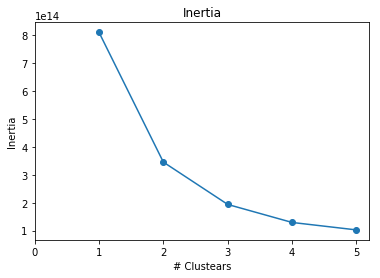

In [185]:
# <help:scikit_k_means_cluster>
import warnings
warnings.filterwarnings('ignore') #notebook outputs warnings, let's ignore them
from time import time
import numpy as np
import matplotlib.pyplot as plt
import sklearn.datasets
from sklearn.cluster import KMeans

# set the number of clusters, must be >=1
n = 6
inertia = [np.NaN]

# perform k-means clustering over i=0...k
for k in range(1,n):
    k_means_ = KMeans(n_clusters=k)
    k_means_.fit(data_ftr)
    #labels = kmeans.labels_
    #print('k = %d, inertia= %f' % (k, k_means_.inertia_ ))
    inertia.append(k_means_.inertia_) 
    
# plot the SSE of the clusters for each value of i
ax = plt.subplot(111)
ax.plot(inertia, '-o')
plt.xticks(range(n))
plt.title("Inertia")
ax.set_ylabel('Inertia')
ax.set_xlabel('# Clustears')
plt.show() 

In [261]:
# <help:scikit_k_means_cluster>
import warnings
warnings.filterwarnings('ignore') #notebook outputs warnings, let's ignore them
from time import time
import numpy as np
import matplotlib.pyplot as plt
import sklearn.datasets
from sklearn.cluster import KMeans

# set the number of clusters, must be >=1
n = 6
inertia = [np.NaN]

# perform k-means clustering over i=0...k

k_means_ = KMeans(n_clusters=3)
k_means_.fit(data_ftr)
labels = k_means_.labels_
#print('k = %d, inertia= %f' % (k, k_means_.inertia_ ))
inertia.append(k_means_.inertia_) 
    

In [262]:
data_ftr['Cluster_Label'] = labels

In [263]:
data_ftr['Cluster_Label'].value_counts()

0    154476
1     87502
2     55950
Name: Cluster_Label, dtype: int64

In [264]:
data_ftr['CASE_STATUS'] =  status

Running classification on the clusters, with 75% of the + data taken out

In [313]:
data_cl0 = data_ftr.loc[data_ftr['Cluster_Label'] ==0]
data_cl0 = data_cl0.drop(data_cl0.query('CASE_STATUS == 1').sample(frac=.75).index)
data_cl1 = data_ftr.loc[data_ftr['Cluster_Label'] ==1]
data_cl1 = data_cl1.drop(data_cl1.query('CASE_STATUS == 1').sample(frac=.75).index)
data_cl2 = data_ftr.loc[data_ftr['Cluster_Label'] ==2]
data_cl2 = data_cl2.drop(data_cl2.query('CASE_STATUS == 1').sample(frac=.75).index)

In [340]:
svc(data_cl0.iloc[:,-1],data_cl0.iloc[:,0:17])

     0      1
0  531   2305
1  236  10596
The accuracy score for this training is 0.814091308165
             precision    recall  f1-score   support

          0       0.69      0.19      0.29      2836
          1       0.82      0.98      0.89     10832

avg / total       0.79      0.81      0.77     13668



In [341]:
svc(data_cl1.iloc[:,-1],data_cl1.iloc[:,0:17])

     0     1
0  211  1317
1  127  6043
The accuracy score for this training is 0.812418810081
             precision    recall  f1-score   support

          0       0.62      0.14      0.23      1528
          1       0.82      0.98      0.89      6170

avg / total       0.78      0.81      0.76      7698



In [342]:
svc(data_cl2.iloc[:,-1],data_cl2.iloc[:,0:17])

     0     1
0  448  1153
1  103  3660
The accuracy score for this training is 0.765846383296
             precision    recall  f1-score   support

          0       0.81      0.28      0.42      1601
          1       0.76      0.97      0.85      3763

avg / total       0.78      0.77      0.72      5364

